# Customer Churn Prediction

## 📖 Overview

This project aims to develop a predictive model for customer churn in a business or service. Customer churn, also known as customer attrition, occurs when customers cease their relationship with a company, often by cancelling their subscription or stopping their purchases. Predicting and preventing customer churn is crucial for businesses as it can significantly impact revenue and profitability.

## 🥅 Objectives

The main objectives of this project are as follows:

- Build a machine learning model that can accurately predict customer churn based on historical data and customer attributes.
- Identify key factors and variables that contribute to customer churn, enabling the company to take proactive measures to retain customers.
- Develop actionable insights and strategies to reduce churn rates and improve customer retention.

## 📑 Data
[Data Link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?source=post_page-----90744a8df97d--------------------------------)  

The data set includes information about:

- Customers who left within the last month – the column       is called Churn
- Services that each customer has signed up for – phone,
  multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a
  customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and
  if they have partners and dependents

## ⏬ Methodology

The project will follow these steps:

1. Data Reading
2. Exploratory Data Analysis and Data Cleaning
3. Data Visualization
4. Feature Importance
5. Feature Engineering
6. Setting a baseline
7. Splitting the data in training and testing sets
8. Training Multiple Models
9. Algorithm selected: Gradient Boosting and Logistic Regression
10. Hyperparameter tuning
11. Drawing conclusions — Summary

## ℹ Data Dictionary  
There are 20 independent and 1 dependent variable in the data.  
- `gender`: Whether the client is a female or a male (Female, Male).  
- `SeniorCitizen`: Whether the client is a senior citizen or not ( 0, 1).  
- `Partner`: Whether the client has a partner or not (Yes, No).
Dependents: Whether the client has dependents or not (Yes, No).  
- `Dependents`: Whether the client has dependents or not (Yes, No).  
- `tenure`: Number of months the customer has stayed with the company (Multiple different numeric values).  
- `Contract`: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).  
- `PaperlessBilling`: Whether the client has paperless billing or not (Yes, No).  
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).  
- `MontlyCharges`: The amount charged to the customer monthly (Multiple different numeric values).  
- `TotalCharges`: The total amount charged to the customer (Multiple different numeric values).  
- `PhoneService`: Whether the client has a phone service or not (Yes, No).  
- `MultipleLines`: Whether the client has multiple lines or not (No phone service, No, Yes).  
- `InternetServices`: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)  
- `OnlineSecurity`: Whether the client has online security or not (No internet service, No, Yes).  
- `OnlineBackup`: Whether the client has online backup or not (No internet service, No, Yes).  
- `DeviceProtection`: Whether the client has device protection or not (No internet service, No, Yes).  
- `TechSupport`: Whether the client has tech support or not (No internet service, No, Yes).  
- `StreamingTV`: Whether the client has streaming TV or not (No internet service, No, Yes).  
- `StreamingMovies`: Whether the client has streaming movies or not (No internet service, No, Yes).





## Data Loading
The first step of the analysis consists of reading and storing the data in a Pandas data frame using the `pandas.read_csv` function.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Telco Customer Churn Prediction/DATA/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Function for data summary
def data_summary(df):

  '''
     Args : df(dataframe)

     Output : Shape of df
              Description
   '''
  print("Shape of the Data :", df.shape)
  print("------------------------------------------------------------------------")
  print("Statistical Description :", df.describe(include="all"))


In [ ]:
data_summary(df)

Shape of the Data : (7043, 21)
------------------------------------------------------------------------
Statistical Description :         customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.

In [ ]:
# Printing column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.columns = ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [ ]:
# check unique values of each column
for column in df.columns:
    print('{} - Unique Values: {}'.format(column, df[column].unique()))
    print("-----------------------------------------------------------------------------------")

CustomerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------------------------------------------------------------------------
Gender - Unique Values: ['Female' 'Male']
-----------------------------------------------------------------------------------
SeniorCitizen - Unique Values: [0 1]
-----------------------------------------------------------------------------------
Partner - Unique Values: ['Yes' 'No']
-----------------------------------------------------------------------------------
Dependents - Unique Values: ['No' 'Yes']
-----------------------------------------------------------------------------------
Tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-------------------------------------------------------------

## Exploratory Data Analysis and Data Cleaning  
Exploratory data analysis (EDA) is a vital part of data science as it helps to discover relationships between the entities of the data we are working on. It is helpful to use EDA when we’re dealing with data for the first time. It also helps with large datasets as it is not practically possible to determine relationships with large unknown data. As we deep dive in EDA, we find various patterns which prove to be fruitful for further data processing and modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Changing the wrong data type
- The `TotalCharges` column is in the wrong data type. We will convert it into `float` data type.

In [ ]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
# Checking for null values
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Missing Values
We see that there are 11 missing values in the `TotalChargea` column.

In [ ]:
df[df["TotalCharges"].isnull()]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Removing Null values
Notice that the `tenure` for these observations is 0 but `MonthlyCharges` is not 0. This information is absurd, so we will remove these observations from the data

In [ ]:
df.dropna(inplace = True)
df.shape

(7032, 21)

### Removing the `customerID` column  
 It has no use in our prediction

In [ ]:
df.drop(columns = ["CustomerID"], inplace= True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualization  
 Data visualization is a crucial tool in data analysis and decision-making across a wide range of fields, including business, science, healthcare, and finance. It enables individuals and organizations to spot trends, patterns, outliers, and correlations within data, making it easier to make informed decisions and communicate data-driven insights effectively.

### Count Plot for Churn column

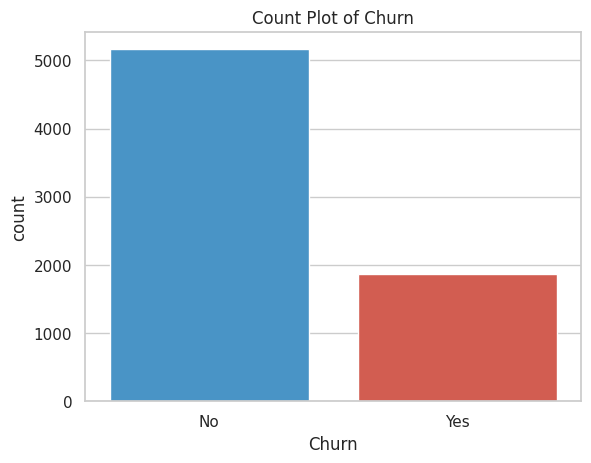

In [ ]:
# Creating a count plot
custom_palette = ['#3498db', '#e74c3c']
sns.set(style='whitegrid')  # Optional style choice
sns.countplot(data=df, x='Churn', palette = custom_palette)

# Displaying the plot
plt.title('Count Plot of Churn')
plt.show()

Calculating the percentage of customers who churned

In [ ]:
total =len(df)
total_churn = len(df[df["Churn"]=="Yes"])
percentage = (total_churn/total)*100
print(f"Total Percentage of customers who churned : {percentage}")


Total Percentage of customers who churned : 26.578498293515356


### Count Plots for Demographic Columns

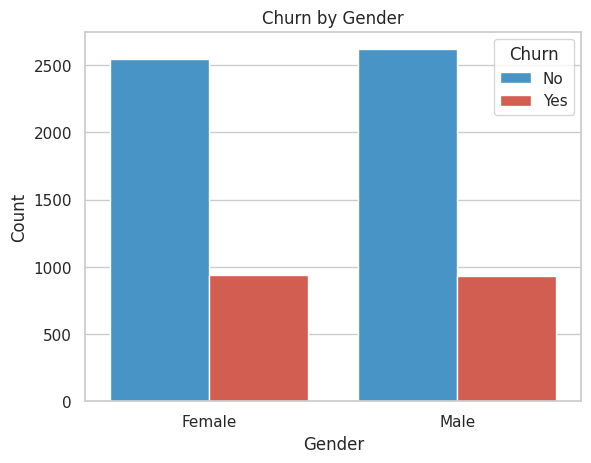

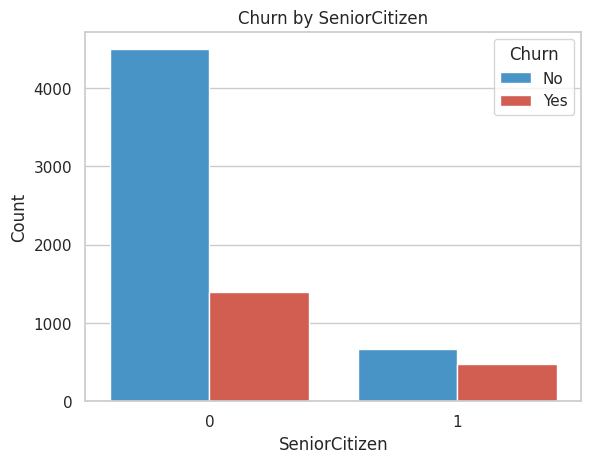

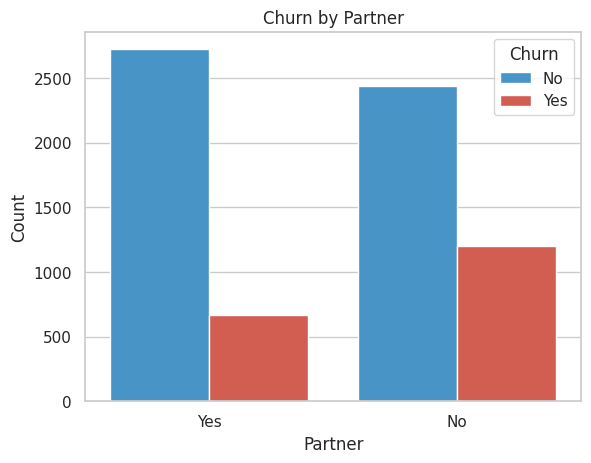

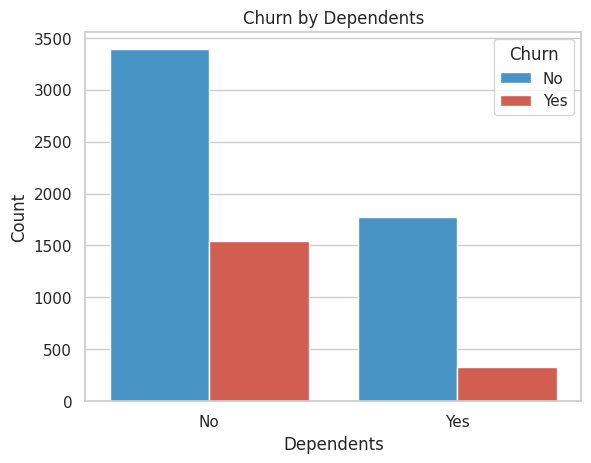

In [ ]:
# Creating a for loop for count plots of demographic coloumns
dem_col = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in dem_col:
  sns.set(style='whitegrid')
  sns.countplot(data=df, x=col, hue='Churn', palette=custom_palette)
  # Adding labels and a title
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Churn by {col}')

  # Displaying the plot
  plt.legend(title='Churn', loc='upper right')
  plt.show()
  print("==============================================================================")


**Observations from the plot above**
- Gender does not tell us anything about churning  
- Senior Citizens are more likey to churn  
- People with dependents are less likely to churn  
- People with partners are slightly less likely to churn

### Bar Chart for Numerical Columns

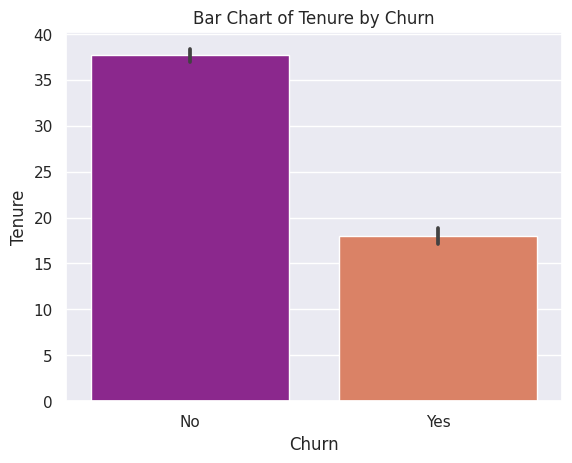

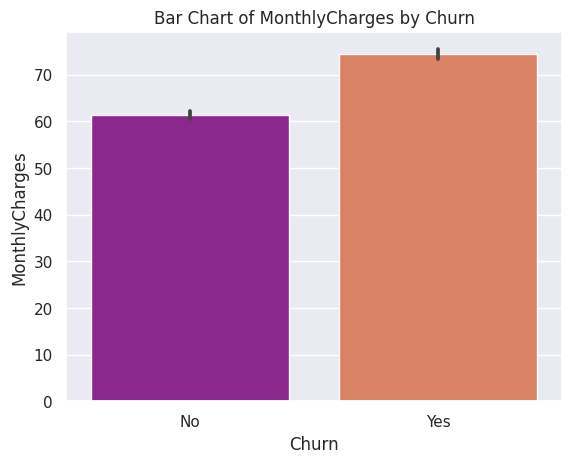

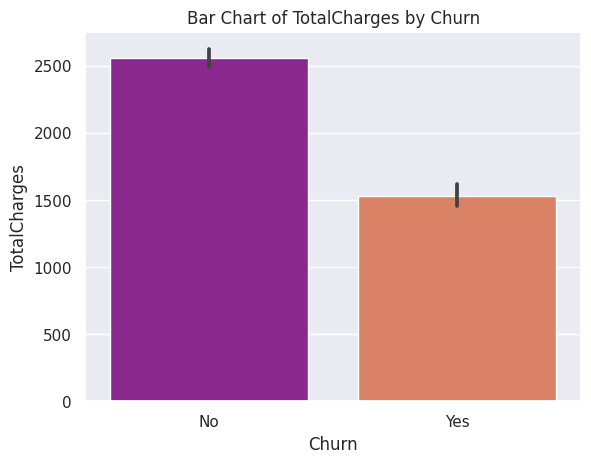

In [ ]:
# Creating a for loop for Bar plots of Numerical coloumns
Num_Col = ["Tenure","MonthlyCharges","TotalCharges"]
for col in Num_Col:
  sns.set(style='darkgrid')
  sns.barplot(data=df, x="Churn", y = col, palette="plasma")
  # Adding labels and a title
  plt.xlabel('Churn')
  plt.ylabel(f'{col}')
  plt.title(f'Bar Chart of {col} by Churn')

  # Displaying the plot
  plt.show()
  print("=================================================================================")

**Observations from the plot above**  
- People with less tenure tend to churn more
- As the Monthly Charges go up, people tend to churn slighlty more

### Count Plot for Other Categorical Columns

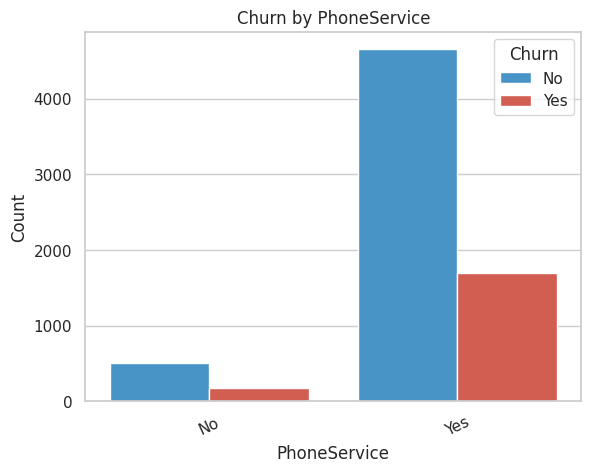

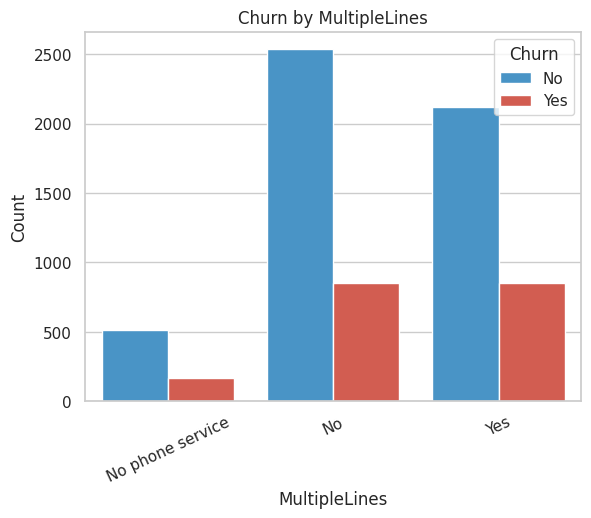

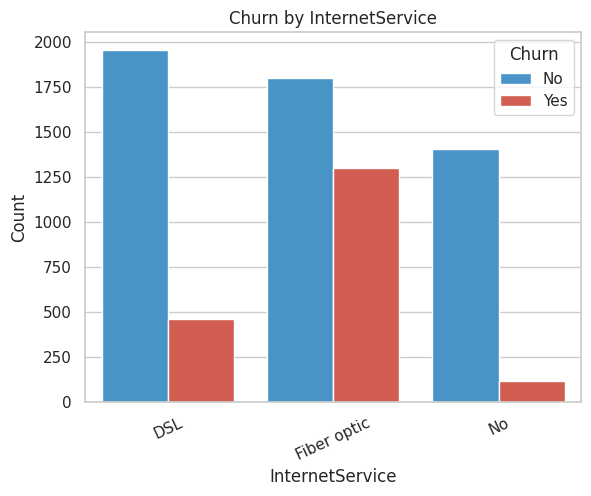

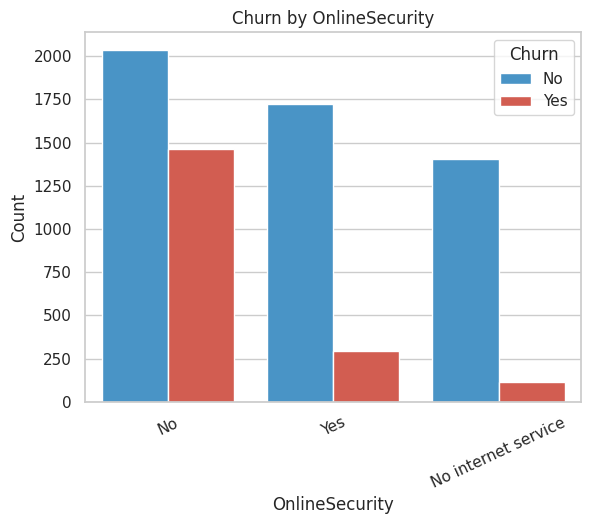

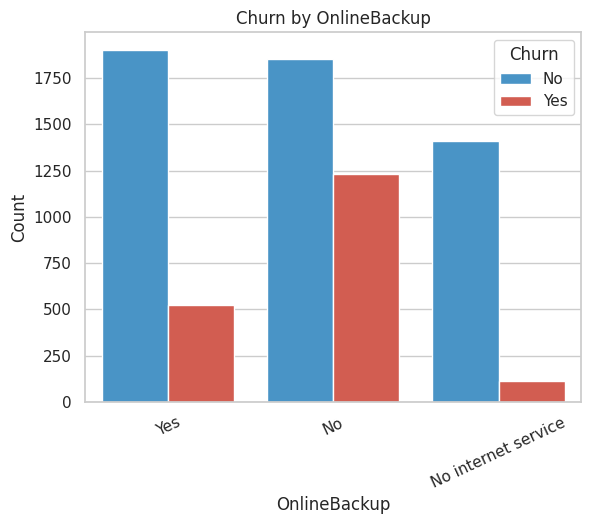

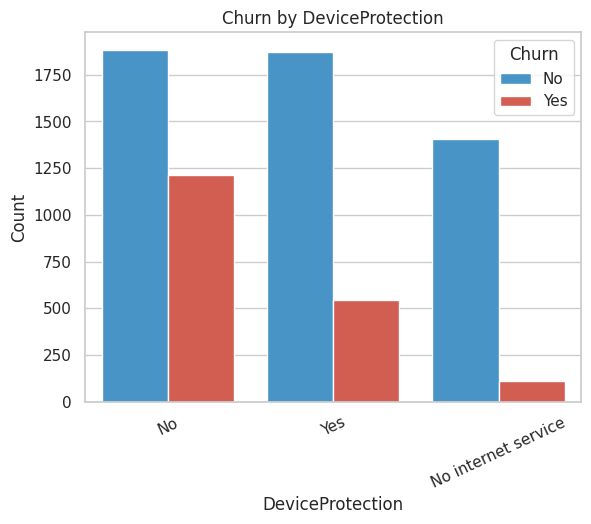

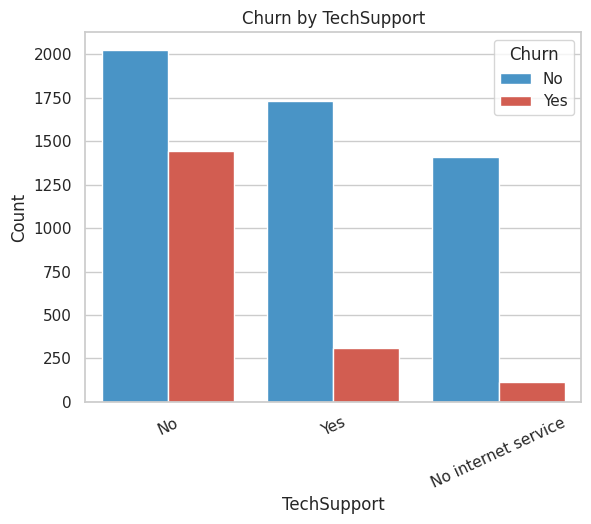

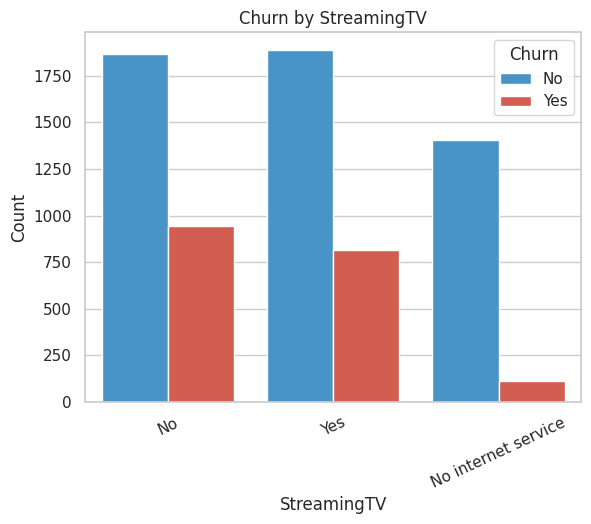

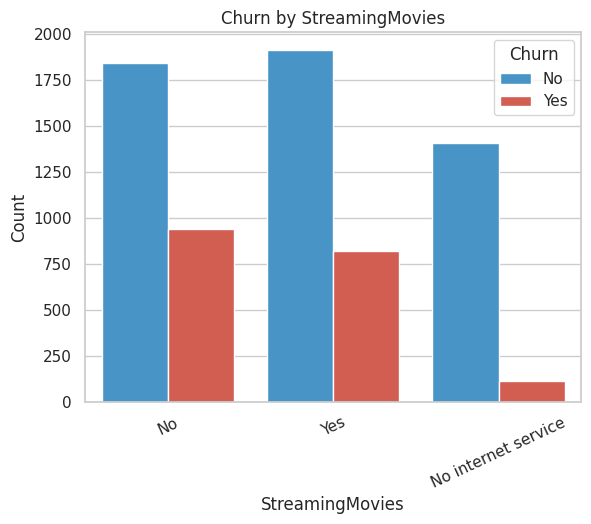

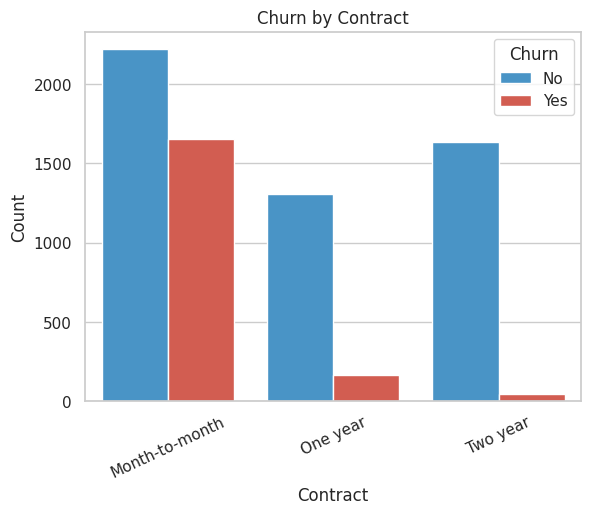

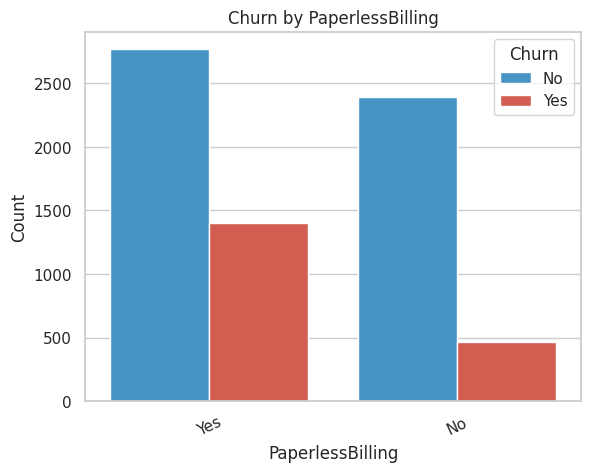

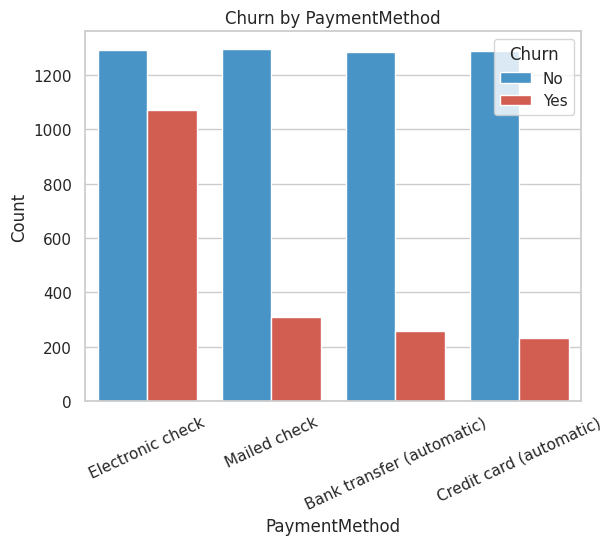

In [ ]:
# Creating a for loop for count plots of coloumns
other_col = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in other_col:
  sns.set(style='whitegrid')
  sns.countplot(data=df, x=col, hue='Churn', palette=custom_palette)
  # Adding labels and a title
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.title(f'Churn by {col}')

  # Displaying the plot
  plt.legend(title='Churn', loc='upper right')
  plt.xticks(rotation=25)
  plt.show()
  print("==========================================================================================")

**Observations from the plot above**
- People with no internet service are very less likey to churn  
- People with no online security are highly likely to churn  
- People with no tech support are highly likely to churn  
- People who take monthly subscription are prone to churn  
- People with 2-year subscription almost never churn  
- Poeple who use electronic check are highly likely to churn

## Feature Importance  
Feature importance refers to the quantification of the influence or relevance of each feature in a predictive model or data analysis task.Feature importance can be determined through various techniques, including statistical methods and machine learning algorithms. In this project, we will use mutual information score.  
  

### Mutual Information Score
Mutual Information measures the entropy drops under the condition of the target value. The MI score will fall in the range from 0 to ∞. The high value of Mi means a closer connection between the feature and the target indicating feature importance for training the model.

In [ ]:
# importing mutual_info_score
from sklearn.metrics import mutual_info_score

# function that computes the mutual information score between a categorical series and the column Churn
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, df['Churn'])

# Selecting categorical variables excluding the response variable
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# Computing the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# Visualize feature importance
print(feature_importance)


Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
Gender              0.000037
dtype: float64


**Observations**  
- `Gender`, `PhoneService` and `MultipleLines` have almost no  contribution in predicting the label.  
- `Contract`, `OnlineSecurity` and `TechSupport` have significant dependency with the label column.

## Feature Engineering  
Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. We will also scale the features to make them uniform and avoid biasedness of the model.

### Label Encoding  
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding for all the categorical features.

In [ ]:
# Function for Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    """
    Args:
        df (pd.DataFrame): The input DataFrame containing categorical features.

    Returns:
        pd.DataFrame: A new DataFrame with categorical features label-encoded.
        dict: A dictionary containing mappings of the original values to encoded values for each categorical feature.
    """
    # Identifying categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Initializing a dictionary to store mappings
    encoding_mappings = {}

    # Creating a new DataFrame to store label-encoded values
    encoded_df = df.copy()

    # Applying label encoding to each categorical column
    for col in categorical_columns:
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(df[col])
        encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return encoded_df, encoding_mappings

# Applying the function on our data
encoded_data, encoding_mappings = label_encode(df)
print(encoding_mappings)


{'Gender': {'Female': 0, 'Male': 1}, 'Partner': {'No': 0, 'Yes': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'No': 0, 'Yes': 1}, 'PaymentMethod': {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}, 'Churn': {'No': 0, 'Yes': 1}}


In [ ]:
df = encoded_data
df.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


###Splitting the data into Train and Test

In [ ]:
# Separating Independent and Label data
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
print(f" Shape of Independent Data :{X.shape}")
print(f" Shape of Label Data :{y.shape}")

# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")




 Shape of Independent Data :(7032, 19)
 Shape of Label Data :(7032,)
Shape of X_train is (5625, 19)
Shape of y_train is (5625,)
Shape of X_test is (1407, 19)
Shape of y_test is (1407,)


### Standardization

In [ ]:
# Function to Standardize the data
from sklearn.preprocessing import StandardScaler
def Standardize(X_train, X_test):
  '''
   Args:
         X_train (Independent Training Dataset)
         X_test (Independent Testing Dataset)

   Returns:
         Array of Standardized X_train
         Array of Standardized X_test
  '''
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test= scaler.transform(X_test)
  return X_train, X_test


In [ ]:
X_train, X_test = Standardize(X_train, X_test)
X_train, X_test

(array([[ 0.9801089 , -0.44391802, -0.96797907, ...,  0.40577658,
          0.86173856, -0.97856887],
        [ 0.9801089 , -0.44391802,  1.03308019, ...,  0.40577658,
          0.8401349 , -0.23320475],
        [ 0.9801089 , -0.44391802,  1.03308019, ...,  0.40577658,
          1.07278969,  2.03677987],
        ...,
        [-1.02029479, -0.44391802,  1.03308019, ...,  0.40577658,
         -0.50760104,  0.11027206],
        [ 0.9801089 , -0.44391802, -0.96797907, ...,  0.40577658,
          0.91657862, -0.81857006],
        [ 0.9801089 , -0.44391802,  1.03308019, ..., -1.46819162,
          1.53809926,  2.31114567]]),
 array([[ 0.9801089 , -0.44391802, -0.96797907, ...,  1.34276068,
         -1.47810387, -0.73639296],
        [-1.02029479, -0.44391802,  1.03308019, ..., -0.53120752,
         -1.32687826, -0.20108118],
        [-1.02029479, -0.44391802, -0.96797907, ..., -0.53120752,
         -0.19351708, -0.67700968],
        ...,
        [-1.02029479, -0.44391802, -0.96797907, ..., -

##Training Multiple Models
 In this step, we will train multiple models and check their performance

In [ ]:
# Creating a function that trains, predicts and returns accuracy, recall confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def Train_Predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Confusuion Matrix")

  cfm = confusion_matrix(y_test,y_pred)
  print(cfm)
  print("===================================================")
  print("Classification report")

  print(classification_report(y_test,y_pred))

  print("====================================================")
  acc = accuracy_score(y_test,y_pred)
  print("Accuracy of the model: ", acc)

  return y_pred




### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[935 111]
 [151 210]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1046
           1       0.65      0.58      0.62       361

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407

Accuracy of the model:  0.8137882018479033


array([0, 0, 0, ..., 0, 0, 0])

**Observations**  
- The base logistic regression model is predicting well on class 0 observations but it is not up to the mark when comes to class 1.  
- We will adjust the probability thershold in order to decrease Type-II error.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Using our function to train predict
model_Decision=DecisionTreeClassifier()
Train_Predict(model_Decision, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[824 222]
 [173 188]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1046
           1       0.46      0.52      0.49       361

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407

Accuracy of the model:  0.7192608386638237


array([0, 0, 0, ..., 0, 0, 0])

### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

model_Random_Forest=RandomForestClassifier()
Train_Predict(model_Random_Forest, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[931 115]
 [156 205]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1046
           1       0.64      0.57      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy of the model:  0.8073916133617626


array([0, 0, 0, ..., 0, 0, 0])

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model_SVC=SVC()
Train_Predict(model_SVC, X_train, X_test, y_train, y_test)


Confusuion Matrix
[[949  97]
 [169 192]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1046
           1       0.66      0.53      0.59       361

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy of the model:  0.8109452736318408


array([0, 0, 0, ..., 0, 0, 0])

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier()
Train_Predict(model_KNN, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[875 171]
 [156 205]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1046
           1       0.55      0.57      0.56       361

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

Accuracy of the model:  0.767590618336887


array([0, 0, 0, ..., 0, 0, 0])

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier()
Train_Predict(model_GradientBoost, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[938 108]
 [158 203]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.65      0.56      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407

Accuracy of the model:  0.8109452736318408


array([0, 0, 0, ..., 0, 0, 0])

### Evaluation Metrics Table



<head>
	<title>Metrics Summary</title>
	<style>
		table td {
			text-align:center;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>LogisticRegression</th>
				<th>DecisionTree</th>
                <th>RandomForest</th>
                <th>SVC</th>
                <th>KNN</th>
                <th>GradientBoosting</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>81.37%</td>
				<td>71.00%</td>
				<td>80.70%</td>
				<td>81.00%</td>
				<td>76.70%</td>
                <td>81.09%</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.86</td>
				<td>0.83</td>
				<td>0.86</td>
				<td>0.85</td>
				<td>0.85</td>
                <td>0.86</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.65</td>
				<td>0.46</td>
				<td>0.64</td>
				<td>0.66</td>
				<td>0.55</td>
                <td>0.65</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.89</td>
				<td>0.79</td>
				<td>0.89</td>
				<td>0.91</td>
				<td>0.84</td>
                <td>0.90</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.58</td>
				<td>0.52</td>
				<td>0.57</td>
				<td>0.53</td>
                <td>0.57</td>
                <td>0.56</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.88</td>
				<td>0.81</td>
				<td>0.87</td>
				<td>0.88</td>
				<td>0.84</td>
                <td>0.88</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.62</td>
				<td>0.49</td>
				<td>0.60</td>
				<td>0.59</td>
                <td>0.56</td>
                <td>0.60</td>
			</tr>
		</tbody>
	</table>
</body>

**Observation**  
- We notice that the Logistic Regression and Grdient Boosting Models are working well on the given data.  
- We will now fine tune these two models and see which one works better

## Hyperparameter Tuning

### Adjustment of Threshold

In [ ]:
# Getting the Probability Matrix
y_pred_prob=model_LogisticRegression.predict_proba(X_test)
y_pred_prob

array([[0.98416301, 0.01583699],
       [0.99742189, 0.00257811],
       [0.85382508, 0.14617492],
       ...,
       [0.99346233, 0.00653767],
       [0.8619863 , 0.1380137 ],
       [0.75746569, 0.24253431]])

In [ ]:
# Getting Type-I and Type-II errors for across all thresholds
for a in np.arange(0.0,1.0,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 1046  , type 2 error : 0  , type 1 error: 1046
Errors at threshold  0.01 : 931  , type 2 error : 0  , type 1 error: 931
Errors at threshold  0.02 : 840  , type 2 error : 0  , type 1 error: 840
Errors at threshold  0.03 : 781  , type 2 error : 0  , type 1 error: 781
Errors at threshold  0.04 : 732  , type 2 error : 1  , type 1 error: 731
Errors at threshold  0.05 : 699  , type 2 error : 2  , type 1 error: 697
Errors at threshold  0.06 : 666  , type 2 error : 3  , type 1 error: 663
Errors at threshold  0.07 : 647  , type 2 error : 6  , type 1 error: 641
Errors at threshold  0.08 : 622  , type 2 error : 6  , type 1 error: 616
Errors at threshold  0.09 : 605  , type 2 error : 12  , type 1 error: 593
Errors at threshold  0.1 : 585  , type 2 error : 15  , type 1 error: 570
Errors at threshold  0.11 : 566  , type 2 error : 18  , type 1 error: 548
Errors at threshold  0.12 : 549  , type 2 error : 19  , type 1 error: 530
Errors at threshold  0.13 : 538  , type 2 error

In [ ]:
# Adjusting the threshold to 0.45
y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [ ]:
# Getting Accuracy, Recall for 0.45
print(f"Confusuion Matrix")

cfm = confusion_matrix(y_test,y_pred_class)
print(cfm)
print("===================================================")
print("Classification report")

print(classification_report(y_test,y_pred_class))

print("====================================================")
acc = accuracy_score(y_test,y_pred_class)
print("Accuracy of the model: ", acc)

Confusuion Matrix
[[894 152]
 [133 228]]
Classification report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1046
           1       0.60      0.63      0.62       361

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Accuracy of the model:  0.7974413646055437


**Observations**  
- After adjusting the theroshold, the recall value for class 1 has gone up very slightly.  
- The improvement is not significant, we will proceed to try some other Algorithms.

### Randomized SearchCV
 Randomized Search CV randomly samples a defined number of hyperparameter combinations from a given search space. This is in contrast to Grid Search, which explores all possible combinations.  
 It is a valuable tool for hyperparameter optimization, especially when computational resources are limited or when you want to quickly identify reasonable hyperparameter configurations.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 3}


### Gradient Boosting using Randomized SearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier(n_estimators=100, min_samples_split=4, max_features="auto", max_depth=3)
Train_Predict(model_GradientBoost, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[939 107]
 [159 202]]
Classification report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.65      0.56      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407

Accuracy of the model:  0.8109452736318408


array([0, 0, 0, ..., 0, 0, 0])

### SMOTE  
SMOTE, short for "Synthetic Minority Over-sampling Technique  is a valuable technique for handling class imbalance in classification problems by generating synthetic samples for the minority class, improving the overall balance of the dataset, and enhancing the model's ability to correctly classify minority class instances.

In [ ]:
print("Before OverSampling, counts of label '1': ", (sum(y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_train_res == 0)))

Before OverSampling, counts of label '1':  1508
Before OverSampling, counts of label '0':  4117
After OverSampling, the shape of train_X:  (8234, 19)
After OverSampling, the shape of train_y:  (8234,)
After OverSampling, counts of label '1':  4117
After OverSampling, counts of label '0':  4117


### Logistic Regression using SMOTE

In [ ]:
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[757 289]
 [ 71 290]]
Classification report
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1046
           1       0.50      0.80      0.62       361

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.76      1407

Accuracy of the model:  0.744136460554371


array([0, 0, 0, ..., 0, 0, 0])

### Gradient Boost using SMOTE and Randomized SearchCV

In [ ]:
model_GradientBoost=GradientBoostingClassifier(n_estimators=100, min_samples_split=4, max_features="auto", max_depth=3)
Train_Predict(model_GradientBoost, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[846 200]
 [104 257]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1046
           1       0.56      0.71      0.63       361

    accuracy                           0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.81      0.78      0.79      1407

Accuracy of the model:  0.7839374555792467


array([0, 0, 0, ..., 0, 0, 0])

## Drawing Conclusion
- We conclude that the **Gradient Boosting Classifier** with **SMOTE** and **Hyperparameter tuning** works very well on the given data.  
- Finally our model is ready to be saved and **Productionized**  
- Please note that the steps of a Machine Learning Project Vary project to project

>>>> # End of the Project


>>>> # Thank You!

